## Original Boundary

In [29]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
import deepxde as dde
from scipy.special import jn_zeros, jv


A = -0.155
eps = 0.32
kappa = 1.7
delta = 0.33
B0 = 5.3 
I0 = 15e6
Cp = 2.79
Vnorm = 0.53
qstar = 1.57
betat = 0.05

def pde_solovev(x, u):
    psi = u[:, 0:1]
    psi_r = dde.grad.jacobian(psi, x, i=0, j=0)
    psi_rr = dde.grad.hessian(psi, x, i=0, j=0)
    psi_zz = dde.grad.hessian(psi, x, i=1, j=1)
    GS = psi_rr - psi_r / x[:, 0:1] + psi_zz - (1 - A) * x[:, 0:1] ** 2 - A
    return GS

def psi_func(x):
    return 0.0

def psi_solovev_analytic(x):
    psi_particular = (1 - A) * x[:, 0:1] ** 4 / 8.0 + A * x[:, 0:1] ** 2 * np.log(x[:, 0:1]) / 2.0
    # Define the first 7 polynomials (up to 6th order) -- see Friedbergs Ideal MHD
    U0 = 1
    U1 = x[:, 0:1] ** 2
    U2 = x[:, 1:2] ** 2 - x[:, 0:1] ** 2 * np.log(x[:, 0:1])
    U3 = x[:, 0:1] ** 4 - 4.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 2
    U4 = 2.0 * x[:, 1:2] ** 4 - 9.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 2 - (12.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 2 - 3 * x[:, 0:1] ** 4) * np.log(x[:, 0:1]) 
    U5 = x[:, 0:1] ** 6 - 12.0 * x[:, 0:1] ** 4 * x[:, 1:2] ** 2 + 8.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 4
    U6 = 8.0 * x[:, 1:2] ** 6 - 14.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 4 + 75.0 * x[:, 0:1] ** 4 * x[:, 1:2] ** 2 - (120.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 4 - 180 * x[:, 0:1] ** 4 * x[:, 1:2] ** 2 + 15.0 * x[:, 0:1] ** 6) * np.log(x[:, 0:1]) 
    # solve for the 6 coefficients 
    
    psi_homogeneous = 0.0  # todo 
    return psi_particular + psi_homogeneous 

spatial_domain = dde.geometry.Ellipse(eps, kappa, delta) 

# specify psi, psi_r, psi_z, psi_rr, psi_zz at three locations 
observe_x = np.asarray([[1 + eps, 0], [1 - eps, 0], [1 - delta * eps, kappa * eps]])
psi_outerEquatorial = 0.0
psi_innerEquatorial = 0.0
psi_highPoint = 0.0
dpsi_dr_highPoint = 0.0

N1 = - (1 + np.arcsin(delta)) ** 2 / (eps * kappa ** 2)
N2 = (1 - np.arcsin(delta)) ** 2 / (eps * kappa ** 2)
N3 = - kappa / (eps * np.cos(np.arcsin(delta)) ** 2)

dpsi_dr_outerEquatorial = 0.0  # todo
dpsi_dr_innerEquatorial = 0.0  # todo
dpsi_dz_highPoint = 0.0  # todo

d2psi_d2z_outerEquatorial = -N1 * dpsi_dr_outerEquatorial
d2psi_d2z_innerEquatorial = -N2 * dpsi_dr_innerEquatorial
d2psi_d2r_highPoint = -N3 * dpsi_dz_highPoint

observe_y = np.asarray([psi_outerEquatorial, psi_innerEquatorial, psi_highPoint]).reshape(3, 1)

observe_y = dde.PointSetBC(observe_x, observe_y)

data = dde.data.PDE(
    spatial_domain,
    pde_solovev,
    observe_y,
    #[observe_y],
    # solution=psi_solovev_analytic,
    anchors=observe_x,
    num_domain=2000,
    num_boundary=500,
    num_test=100,
    train_distribution="LHS"
)

KeyboardInterrupt: 

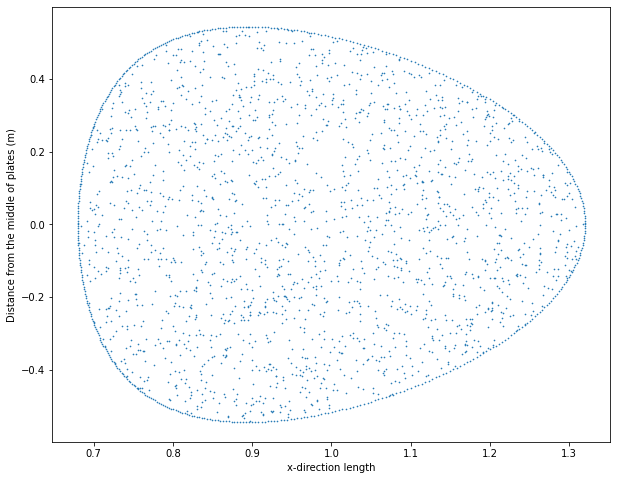

In [ ]:
# Plot collocation points for visual check
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_all[:,0], data.train_x_all[:,1], s = 0.4)

plt.xlabel('x-direction length')
plt.ylabel('Distance from the middle of plates (m)')
plt.show()

## Modified Boundary Constraints

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
import deepxde as dde
from scipy.special import jn_zeros, jv

A = -0.155
eps = 0.32
kappa = 1.7
delta = 0.33
B0 = 5.3 
I0 = 15e6
Cp = 2.79
Vnorm = 0.53
qstar = 1.57
betat = 0.05

def psi_r(x,u):
    return dde.grad.jacobian(u, x, i=0, j=0)
def psi_z(x,u):
    return  dde.grad.jacobian(u, x, i=0, j=1)
def psi_rr(x, u):
    return dde.grad.hessian(u, x, i=0, j=0)
def psi_zz(x, u):
    return dde.grad.hessian(u, x, i=1, j=1)

def pde_solovev(x, u):
    psi = u[:, 0:1]
    GS = (
        psi_rr(x, psi) - psi_r(x, psi) / x[:, 0:1] + psi_zz(x, psi) - (1 - A) * x[:, 0:1] ** 2 - A
    )

    return [GS]

def psi_func(x):
    return 0.0
spatial_domain = dde.geometry.Ellipse(eps, kappa, delta) 

# specify psi, psi_r, psi_z, psi_rr, psi_zz at three locations 
observe_x = np.asarray([[1 + eps, 0], [1 - eps, 0], [1 - delta * eps, kappa * eps]])
# Instead of Pointset you can create specific boundary point
# This seems like a double calculation to get a specific point and also do boundary calculation?
def boundary_outer(x, on_boundary):
    return on_boundary and np.isclose([x[0], x[1]], [1 + eps, 0]).all()
def boundary_inner(x, on_boundary):
    return on_boundary and np.isclose([x[0], x[1]], [1 - eps, 0]).all()
def boundary_high(x, on_boundary):
    return on_boundary and np.isclose([x[0], x[1]], [1 - delta * eps, kappa * eps]).all()

psi_outerEquatorial = 0.0
psi_innerEquatorial = 0.0
psi_highPoint = 0.0
dpsi_dr_highPoint = 0.0
N1 = - (1 + np.arcsin(delta)) ** 2 / (eps * kappa ** 2)
N2 = (1 - np.arcsin(delta)) ** 2 / (eps * kappa ** 2)
N3 = - kappa / (eps * np.cos(np.arcsin(delta)) ** 2)

bc1 = dde.DirichletBC(spatial_domain, psi_outerEquatorial, boundary_outer)
bc3 = dde.DirichletBC(spatial_domain, psi_innerEquatorial, boundary_inner)
bc5 = dde.DirichletBC(spatial_domain, psi_highPoint, boundary_high)


bc2 = dde.OperatorBC(spatial_domain ,lambda x, u, _: psi_zz(x, u)+N1*psi_r(x,u), boundary_outer)
bc4 = dde.OperatorBC(spatial_domain ,lambda x, u, _: psi_zz(x, u)+N2*psi_r(x,u), boundary_inner)
bc6 = dde.OperatorBC(spatial_domain ,lambda x, u, _: psi_r(x, u), boundary_high)
bc7 = dde.OperatorBC(spatial_domain ,lambda x, u, _: psi_rr(x, u)+N3*psi_z(x,u), boundary_high)

dpsi_dr_outerEquatorial = 0.0  # todo
dpsi_dr_innerEquatorial = 0.0  # todo
dpsi_dz_highPoint = 0.0  # todo
d2psi_d2z_outerEquatorial = -N1 * dpsi_dr_outerEquatorial
d2psi_d2z_innerEquatorial = -N2 * dpsi_dr_innerEquatorial
d2psi_d2r_highPoint = -N3 * dpsi_dz_highPoint
observe_y = np.asarray([psi_outerEquatorial, psi_innerEquatorial, psi_highPoint]).reshape(3, 1)
bc135 = dde.PointSetBC(observe_x, observe_y)

data = dde.data.PDE(
    spatial_domain,
    pde_solovev,
    [bc135],
    anchors=observe_x,
    num_domain=500,
    num_boundary=300,
    num_test=100,
    train_distribution="LHS"
)

KeyboardInterrupt: 

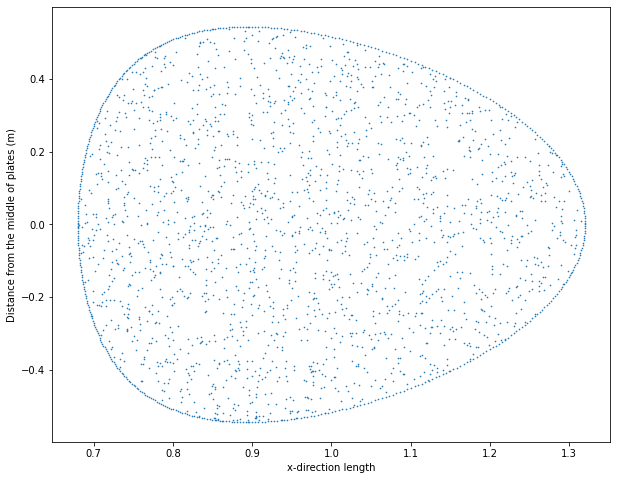

In [30]:
# Plot collocation points for visual check
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_all[:,0], data.train_x_all[:,1], s = 0.4)
plt.xlabel('x-direction length')
plt.ylabel('Distance from the middle of plates (m)')
plt.show()

## Modified Slim

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
import deepxde as dde
from scipy.special import jn_zeros, jv


A = -0.155
eps = 0.32
kappa = 1.7
delta = 0.33

N1 = - (1 + np.arcsin(delta)) ** 2 / (eps * kappa ** 2)
N2 = (1 - np.arcsin(delta)) ** 2 / (eps * kappa ** 2)
N3 = - kappa / (eps * np.cos(np.arcsin(delta)) ** 2)

def gen_traindata(num):
    eps = 0.32
    kappa = 1.7
    delta = 0.33
    N = num
    center, eps, kappa, delta = np.array([[0.0,0.0]]), eps, kappa, delta
    tau = np.linspace(0, 2 * np.pi, N)
    # Define boundary of ellipse
    x_ellipse = np.asarray([1 + eps * np.cos(tau + np.arcsin(delta) * np.sin(tau)), 
                    eps * kappa * np.sin(tau)]).T
    xvals = x_ellipse
    uvals = np.zeros(len(xvals)).reshape(len(xvals), 1)
    return xvals, uvals


def pde_solovev(x, u):
    psi = u[:, 0:1]
    psi_r = dde.grad.jacobian(psi, x, i=0, j=0)
    psi_rr = dde.grad.hessian(psi, x, i=0, j=0)
    psi_zz = dde.grad.hessian(psi, x, i=1, j=1)
    GS = psi_rr - psi_r / x[:, 0:1] + psi_zz - (1 - A) * x[:, 0:1] ** 2 - A
    return GS

def psi_r(x,u):
    return dde.grad.jacobian(u, x, i=0, j=0)
def psi_z(x,u):
    return  dde.grad.jacobian(u, x, i=0, j=1)
def psi_rr(x, u):
    return dde.grad.hessian(u, x, i=0, j=0)
def psi_zz(x, u):
    return dde.grad.hessian(u, x, i=1, j=1)

def boundary_outer(x, on_boundary):
    return on_boundary and np.isclose([x[0], x[1]], [1 + eps, 0]).all()
def boundary_inner(x, on_boundary):
    return on_boundary and np.isclose([x[0], x[1]], [1 - eps, 0]).all()

def boundary_high(x, on_boundary):
    return on_boundary and np.isclose([x[0], x[1]], [1 - delta * eps, kappa * eps]).all()

spatial_domain = dde.geometry.Ellipse(eps, kappa, delta) 

x,u = gen_traindata(0)

# specify psi, psi_r, psi_z, psi_rr, psi_zz at four locations 
observe_x = np.asarray([[1 + eps, 0], [1 - eps, 0], [1 - delta * eps, kappa * eps],[1 - delta * eps, -kappa * eps]])
observe_y = np.asarray([0.0, 0.0, 0.0, 0.0]).reshape(4, 1)

observe_x = np.concatenate((x,observe_x))
observe_y = np.concatenate((u,observe_y))

bc135 = dde.PointSetBC(observe_x, observe_y)

# x[0] = R
# x[1] = Z
# u[0] = U
# is x all the boundary points?
bc2 = dde.OperatorBC(spatial_domain ,
                    lambda x, u, _: psi_zz(x, u)+ N1*psi_r(x,u), 
                    boundary_outer)

bc4 = dde.OperatorBC(spatial_domain,
                    lambda x, u, _: psi_zz(x, u)+ N2*psi_r(x,u), 
                    boundary_inner)

bc6 = dde.OperatorBC(spatial_domain ,lambda x, u, _: psi_r(x, u), boundary_high)
bc7 = dde.OperatorBC(spatial_domain ,lambda x, u, _: psi_rr(x, u)+N3*psi_z(x,u), boundary_high)


data = dde.data.PDE(
    spatial_domain,
    pde_solovev,
    [bc135, bc2, bc4,bc6,bc7],
    anchors=observe_x,
    num_domain=2000,
    num_boundary=0,
    num_test=100,
    train_distribution="LHS"
)

Using TensorFlow 2 backend.

Instructions for updating:
non-resource variables are not supported in the long term


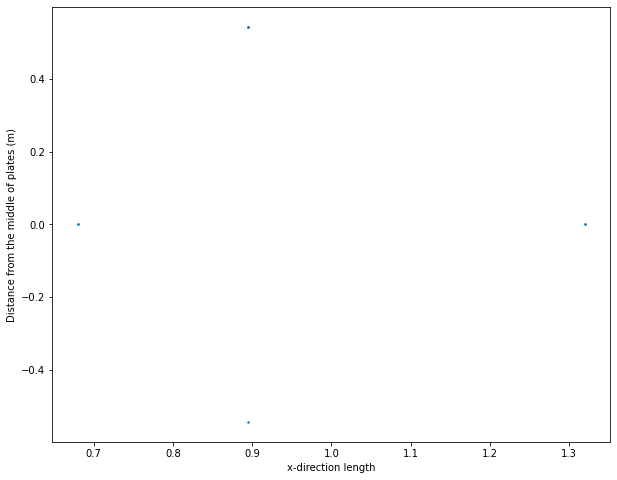

In [2]:
# Plot collocation points for visual check
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_bc[:,0], data.train_x_bc[:,1], s = 2)
# plt.scatter(observe_x[:,0], observe_x[:,1], s = 10,c="red")
# plt.scatter(x[:,0], x[:,1], s = 10,c="red")

plt.xlabel('x-direction length')
plt.ylabel('Distance from the middle of plates (m)')
plt.show()

## Train Model

Compiling model...
Building feed-forward neural network...
'build' took 0.065812 s



/Users/chrisjang/Documents/UMD/Research/MHD/PINN/deepxde_copy/deepxde/maps/fnn.py:105: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2022-07-07 11:45:48.888521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 1.005758 s

Initializing variables...
Training model...



2022-07-07 11:45:49.851588: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Step      Train loss                                                      Test loss                                                       Test metric
0         [1.13e+00, 4.54e-03, 1.92e-03, 4.56e-03, 4.25e-03, 3.25e-01]    [1.14e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [2.41e-03, 4.80e-04, 2.28e-06, 6.62e-07, 1.59e-06, 1.64e-07]    [2.34e-03, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2000      [1.86e-04, 2.05e-04, 1.20e-06, 7.91e-08, 2.80e-07, 6.74e-09]    [2.10e-04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3000      [1.24e-04, 1.16e-04, 6.21e-07, 3.22e-07, 2.08e-07, 5.71e-09]    [1.40e-04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4000      [1.33e-04, 2.57e-04, 1.48e-03, 8.36e-05, 1.54e-04, 1.40e-02]    [1.21e-04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 3000:
  train loss: 2.41e-04
  test loss: 1.40e-04
  test metric: []

'train' took 81.300220 s

Compiling model...


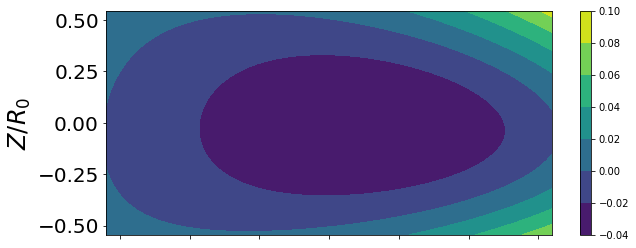

In [3]:
net = dde.maps.FNN([2] + 4 * [40] + [1], "tanh", "Glorot normal")

model = dde.Model(data, net)

# Compile, train and save model
model.compile(
    "adam", lr=1e-3,
    # loss_weights=[100, 1000]
)
loss_history, train_state = model.train(epochs=4000)
# dde.saveplot(loss_history, train_state, issave=True, isplot=True)

# Compile, train and save model
model.compile(
    "adam", lr=1e-4,
    # loss_weights=[100, 1000]
)
loss_history, train_state = model.train(epochs=4000)
# dde.saveplot(loss_history, train_state, issave=True, isplot=True)

# make mesh
nx = 100
ny = 100
tau = np.linspace(0, 2 * np.pi, 1000)
x, y = np.meshgrid(
    np.linspace(1 - eps, 1 + eps, nx),
    np.linspace(-kappa * eps, kappa * eps, ny),
)

X = np.vstack((np.ravel(x), np.ravel(y))).T

output = model.predict(X)

# psi is only predicted up to overall constant 
# so normalize to psi0 
psi_pred = output[:, 0].reshape(-1)
# psi_pred = psi_pred / np.max(np.abs(psi_pred)) * psi0
psi_pred = np.reshape(psi_pred, [nx, ny])
print(psi_pred.shape)
plt.figure(figsize=(10, 14))
plt.subplot(3, 1, 1)
plt.contourf(x, y, psi_pred)
plt.colorbar()  # ticks=np.linspace(0, 0.105, 10))
plt.ylabel(r'$Z/R_0$', fontsize=24)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels([])

# psi_true = psi_solovev_analytic(X)
# psi_true = np.reshape(psi_true, [nx, ny])
# plt.subplot(3, 1, 2)
# plt.contourf(x, y, psi_true)
# plt.colorbar()  # ticks=np.linspace(0, 0.105, 10))
# plt.ylabel(r'$Z/R_0$', fontsize=24)
# ax = plt.gca()
# ax.tick_params(axis='x', labelsize=20)
# ax.tick_params(axis='y', labelsize=20)
# ax.set_xticklabels([])

# plt.subplot(3, 1, 3)
# plt.contourf(x, y, np.abs(psi_true - psi_pred))
# plt.colorbar()
# plt.xlabel(r'$R/R_0$', fontsize=24)
# plt.ylabel(r'$Z/R_0$', fontsize=24)
# ax = plt.gca()
# ax.tick_params(axis='x', labelsize=20)
# ax.tick_params(axis='y', labelsize=20)
# plt.savefig('PINN_solovev.jpg')
# # psi_exact = psi_func(X).reshape(-1)

GS = model.predict(X, operator=pde_solovev)

residual_psi = np.mean(np.absolute(GS))

print("Accuracy")
print("Mean residual:", residual_psi)

(100, 100)


[Text(0.6000000000000001, 0, ''),
 Text(0.7000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(0.9000000000000001, 0, ''),
 Text(1.0, 0, ''),
 Text(1.1, 0, ''),
 Text(1.2000000000000002, 0, ''),
 Text(1.3000000000000003, 0, ''),
 Text(1.4000000000000001, 0, '')]

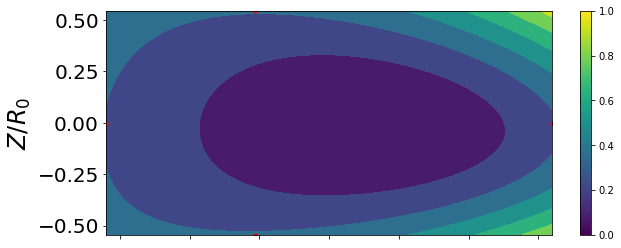

In [4]:
print(psi_pred.shape)
plt.figure(figsize=(10, 14))
plt.subplot(3, 1, 1)
plt.contourf(x, y, psi_pred)
plt.scatter(observe_x[:,0], observe_x[:,1], s = 10,c="red")
plt.colorbar()  # ticks=np.linspace(0, 0.105, 10))
plt.ylabel(r'$Z/R_0$', fontsize=24)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels([])

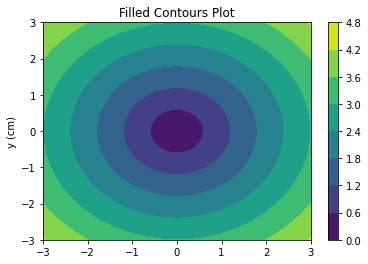

In [62]:
import numpy as np
import matplotlib.pyplot as plt
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [60]:
y

array([[-0.544    , -0.544    , -0.544    , ..., -0.544    , -0.544    ,
        -0.544    ],
       [-0.5330101, -0.5330101, -0.5330101, ..., -0.5330101, -0.5330101,
        -0.5330101],
       [-0.5220202, -0.5220202, -0.5220202, ..., -0.5220202, -0.5220202,
        -0.5220202],
       ...,
       [ 0.5220202,  0.5220202,  0.5220202, ...,  0.5220202,  0.5220202,
         0.5220202],
       [ 0.5330101,  0.5330101,  0.5330101, ...,  0.5330101,  0.5330101,
         0.5330101],
       [ 0.544    ,  0.544    ,  0.544    , ...,  0.544    ,  0.544    ,
         0.544    ]])

## MISC

In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
import deepxde as dde
from scipy.special import jn_zeros, jv


A = -0.155
eps = 0.32
kappa = 1.7
delta = 0.33
B0 = 5.3 
I0 = 15e6
Cp = 2.79
Vnorm = 0.53
qstar = 1.57
betat = 0.05

def pde_solovev(x, u):
    psi = u[:, 0:1]
    psi_r = dde.grad.jacobian(u, x, i=0, j=0)
    psi_rr = dde.grad.hessian(u, x, i=0, j=0)
    psi_zz = dde.grad.hessian(u, x, i=1, j=1)
    GS = (
        psi_rr - psi_r / x[:, 0:1] + psi_zz - (1 - A) * x[:, 0:1] ** 2 - A
    )

    return [GS]

def psi_func(x):
    return 0.0

def psi_solovev_analytic(x):
    psi_particular = (1 - A) * x[:, 0:1] ** 4 / 8.0 + A * x[:, 0:1] ** 2 * np.log(x[:, 0:1]) / 2.0
    # Define the first 7 polynomials (up to 6th order) -- see Friedbergs Ideal MHD
    U0 = 1
    U1 = x[:, 0:1] ** 2
    U2 = x[:, 1:2] ** 2 - x[:, 0:1] ** 2 * np.log(x[:, 0:1])
    U3 = x[:, 0:1] ** 4 - 4.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 2
    U4 = 2.0 * x[:, 1:2] ** 4 - 9.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 2 - (12.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 2 - 3 * x[:, 0:1] ** 4) * np.log(x[:, 0:1]) 
    U5 = x[:, 0:1] ** 6 - 12.0 * x[:, 0:1] ** 4 * x[:, 1:2] ** 2 + 8.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 4
    U6 = 8.0 * x[:, 1:2] ** 6 - 14.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 4 + 75.0 * x[:, 0:1] ** 4 * x[:, 1:2] ** 2 - (120.0 * x[:, 0:1] ** 2 * x[:, 1:2] ** 4 - 180 * x[:, 0:1] ** 4 * x[:, 1:2] ** 2 + 15.0 * x[:, 0:1] ** 6) * np.log(x[:, 0:1]) 
    # solve for the 6 coefficients 
    
    psi_homogeneous = 0.0  # todo 
    return psi_particular + psi_homogeneous 

geom = dde.geometry.Ellipse(eps, kappa, delta) 

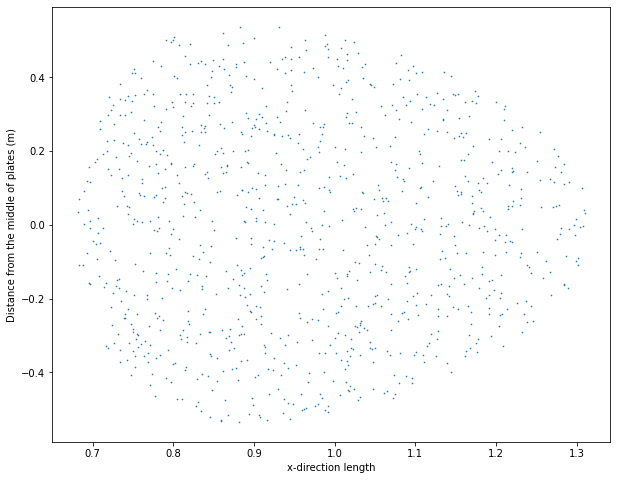

In [12]:
# Plot collocation points for visual check
plt.figure(figsize = (10,8))
plt.scatter(x[:,0], x[:,1], s = 0.4)
plt.xlabel('x-direction length')
plt.ylabel('Distance from the middle of plates (m)')
plt.show()

In [11]:
x = geom.random_points(1000)

In [ ]:
x_inside = geom.inside(x)